# Week 2: Linear Regression (Solution)


Supervised learning is a powerful way to teach machines to tackle all kinds of tasks, from recognizing objects in images to predicting future outcomes based on historical data. Here are some key words you should know:
- Learning algorithm
- Training data
- Examples
- Features
- Labels
- Parameters

A simple, yet very important problem we need to tackle is predicting ouput labels based on given input features with a trained model containing parameters that should maximise performance. The model is trained via a learning algoirthm to find these parameters. Linear regression is a technique used to solve problems like this. It allows us to draw a straight line through the scattered data points, allowing us to make predictions and uncover valuable insights.

In this notebook, we will be using Numpy - please refer to 3_1_numerical_analysis.ipynb from our Introduction to Python folder for more information!

**Solution is wrapped around by ###.** Note that this is only an _example_ solution - if you have something else that gives a good output, that is still fine!

### Linear regression implemented with Scikit-Learn

Intercept: -32.075009716284455
Slope: 6.633113097551495


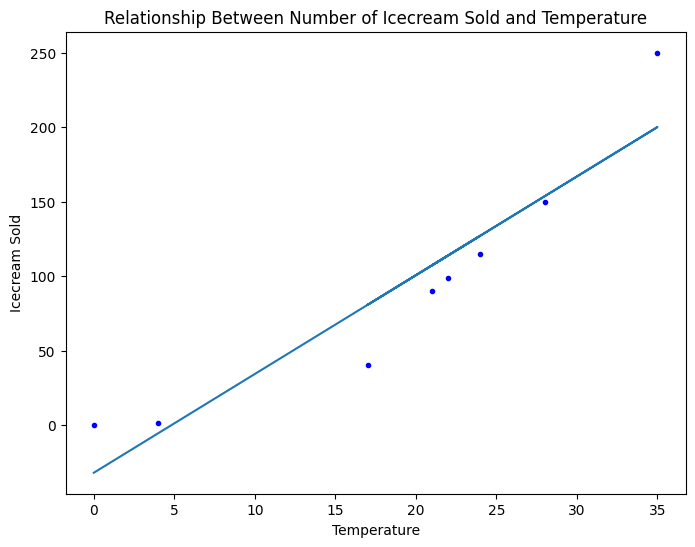

In [1]:
# Import the packages and classes needed in this example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a numpy array of data:
temperature = np.array([0, 4, 35, 28, 21, 24, 17, 22]).reshape((-1, 1))
icecream_sold = np.array([0, 1, 250, 150, 90, 115, 40, 99])

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression().fit(temperature, icecream_sold)

# The following section will get results by interpreting the created instance:
# Print the Intercept:
print("Intercept:", model.intercept_)

# Print the Slope:
print("Slope:", model.coef_[0])

pred = temperature * model.coef_ + model.intercept_

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Relationship Between Number of Icecream Sold and Temperature")
plt.ylabel("Icecream Sold")
plt.xlabel("Temperature")
plt.plot(temperature, icecream_sold, "b.")

# Plotting prediction computed with line fitting
plt.plot(temperature, pred)

## Line Fitting 
Below, we have generated a set of n examples (a set of features paired with labels) where the labels are linearly mapped from the features with noise added. The goal is to find the best fit line for this dataset. There are many approaches to solve this:

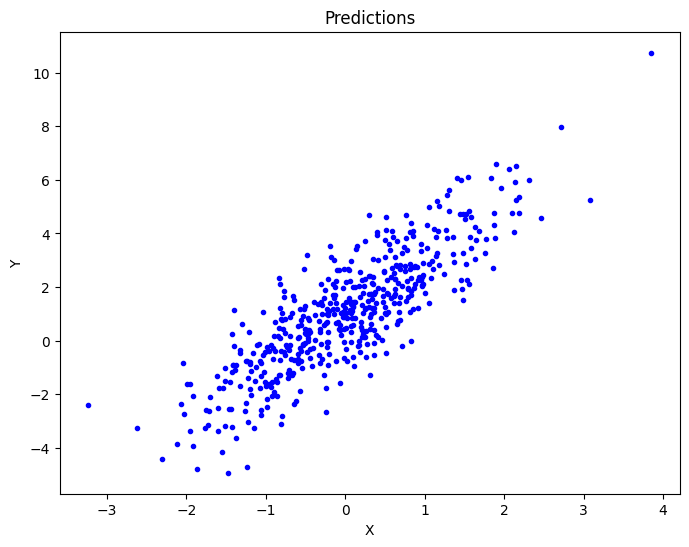

In [2]:
# Generate a set of examples
np.random.seed(42)
n = 500
X = np.random.randn(n, 1)
y = 2 * X + 1 + 1.2 * np.random.randn(n, 1)

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.show()

#### 1. Random Guess
In this example, we only have two parameters $\theta_0$ and $\theta_1$ that define our linear regression model. Since we don't have any better idea right now, how about we just take a random guess? Let's try $\theta_0 = 1$ and $\theta_1 = 2$ and plot the resulting line:

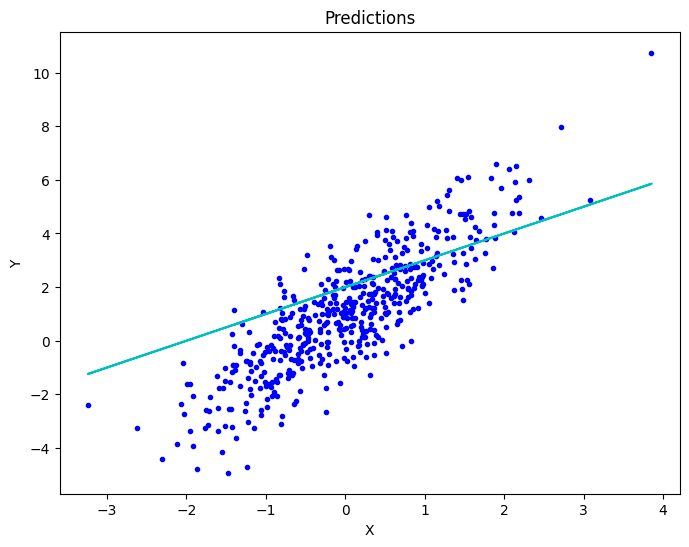

In [3]:
# method 1
def random_guess(X):
    theta_1 = 1
    theta_0 = 2
    pred = X * theta_1 + theta_0
    return pred


pred1 = random_guess(X)

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred1, "c-")
plt.show()

That's not terrible for a guess, but our slope is too small. If we were to do better, it might be useful to define some kind of a *cost function* that defines how far off our predictions were from the actual data. For linear regression model, the most natural / common cost function to use is the **Mean Squared Error (MSE)**. Mathematically, MSE is defined as following:

$$mse(\theta) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2$$

Since we are randomly guessing, this method is very unreliable and may take many tries to get a good solution.


#### 2. Closed-form solution with the Normal Equation

If you know a bit of linear algebra, you might know that there is a *closed-form* solution to the least-squares problem that gives us the optimal values for $a$ and $b$. We won't go through the proof here, but interested students can check out Lecture 15 of Gilbert Strang's wonderful Linear Algebra lecture series on Youtube. Here is the equation (called the *Normal Equation*) for obtaining the optimal $\theta$ that minimizes the squared loss of our best-fit line:

$$\theta = (X^T X)^{-1} X^T y $$

$X$ is a *matrix* form of the input variables of dimensions $m$ by $n$, where $m$ is the number of data instances (i.e. `len(df)` in our case, $m=200$) and $n$ is the dimension of the feature vectors (for our simple linear regression example, we have $n=2$: $x_1$ representing the TV advertising budget and $x_0$ which is always 1 for the bias term).

Don't worry if you don't get why this works, as this isn't a linear algebra course! That said, we'll continue with the code now to show how to use scikit-learn to solve this problem:

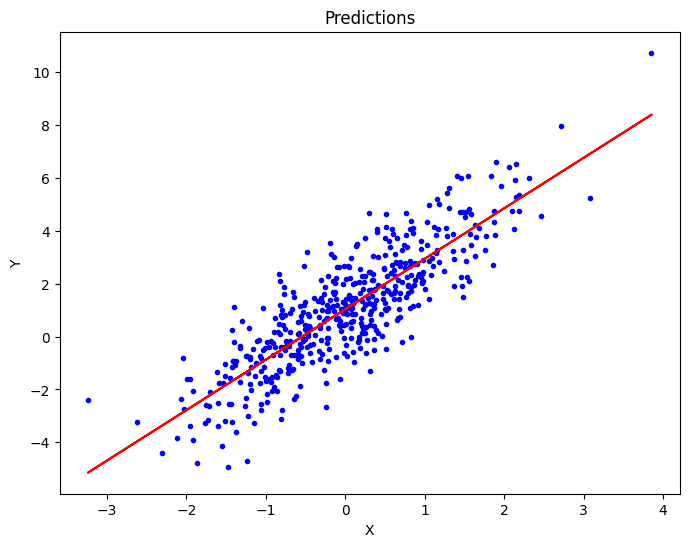

In [4]:
### SOLUTION

model = LinearRegression()
model.fit(X, y)
pred2 = model.predict(X)

###

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred2, "r-")

#### 3. Optimization with Gradient Descent

A problem with calculating the closed-form solution problems like above is that the computation cost of calculating it does not scale efficiently as the number of independent variables increases. In most real-world data, we usually have many independent variables which could affect $y$ in various ways. If we have $k$ such independent variables, then the computational cost of finding the closed-form solution is dominated by the calculation of the inverse of $X^T X$, which is $O(k^3)$. For most real-world data, this is too computationally expensive.

Instead, we can train our linear regression model gradually, using a technique called **gradient descent**. We explore gradient descent in much more detail next week, but for now you can think of it as an optimization algorithm that iteratively modifies parameters in way that minimizes a predefined cost function. It does so by finding the derivative of the cost function with regards to the said parameters, which tells the algorithm mathematically how to change each parameter to result in a smaller cost.

Now let's derive the derivative of our MSE loss with respect to $\theta_0$ and $\theta_1$. Recall that MSE is expressed as:

$$mse(\theta) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2$$

Let's now compute the partial derivate of the loss with regard to parameter $\theta_0$, our bias term:

$$\frac{\partial mse(\theta)}{\partial \theta_0} = \frac{2}{m}\sum_{i=1}^{m}  ((\theta_0 + \theta_1 x_i) - y_i) \cdot 1 $$

And the partial derivate of the loss with regard to parameter $\theta_1$:

$$\frac{\partial mse(\theta)}{\partial \theta_1} = \frac{2}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i) \cdot x_i$$


Here is our update rule for the parameters $\theta_0$ and $\theta_1$ at iteration $t$, using gradient descent:

$$\theta_i^{(t+1)} = \theta_i^t - \eta \cdot \frac{\partial mse(\theta)}{\partial \theta_i} $$

where $\eta$ is what's called the **learning rate**.

Now, let's look at the code for fitting a linear regression model with gradient descent:

Before we optimise with gradient descent, we are going to use `scikit-learn`'s `StandardScaler` to scale our independent variable before adding the bias terms. Otherwise, you'll find that you'll need to use an extremely low learning rate to train the model properly. While we could have used a simpler example where all the data are drawn from a standard normal distribution, we wanted to show you that preprocessing is often a very important step in machine learning projects, because the data you're working with can come in any form!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def gradient_descent(X, y, learning_rate, record_at, num_iterations=2000):
    theta_0 = np.zeros((1, 1))
    theta_1 = np.zeros((1, 1))
    theta_hist = []

    for it in range(num_iterations):

        ### Type out the three formulae above.
        ### 1) Compute the MSE (mean squared error) for the current values of theta_0 and theta_1.
        ### 2) Compute the gradient of the MSE with respect to theta_0.
        ### 3) Compute the gradient of the MSE with respect to theta_1.

        mse = 1 / len(X) * np.sum(((theta_1 * X + theta_0) - y) ** 2)
        d_theta_0 = 2 / len(X) * np.sum(((theta_1 * X + theta_0) - y))
        d_theta_1 = 2 / len(X) * X.T.dot(((theta_1 * X + theta_0) - y))

        ### Now update the values of theta_0 and theta_1 using the fourth formula.

        theta_0 -= learning_rate * d_theta_0
        theta_1 -= learning_rate * d_theta_1

        ###

        if it in record_at:
            theta_hist.append((theta_0.copy(), theta_1.copy()))
    return theta_0, theta_1, theta_hist


### SOLUTION
lr = 0.001
### SOLUTION

record_at = [10, 100, 500, 1800]
theta_0, theta_1, theta_hist = gradient_descent(X_scaled, y, lr, record_at)

# Plotting the data.
fig, ax = plt.subplots(1, 4, figsize=(20, 5))


for i in range(4):
    theta_0_it, theta_1_it = theta_hist[i]
    y_pred_it = X_scaled.dot(theta_1_it) + theta_0_it
    ax[i].set_title("Number of Iterations: " + str(record_at[i]))
    ax[i].scatter(X, y)
    ax[i].plot(X, y_pred_it, color="r")
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")

fig.subplots_adjust(wspace=0.5)

plt.show()

c:\Users\suhai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


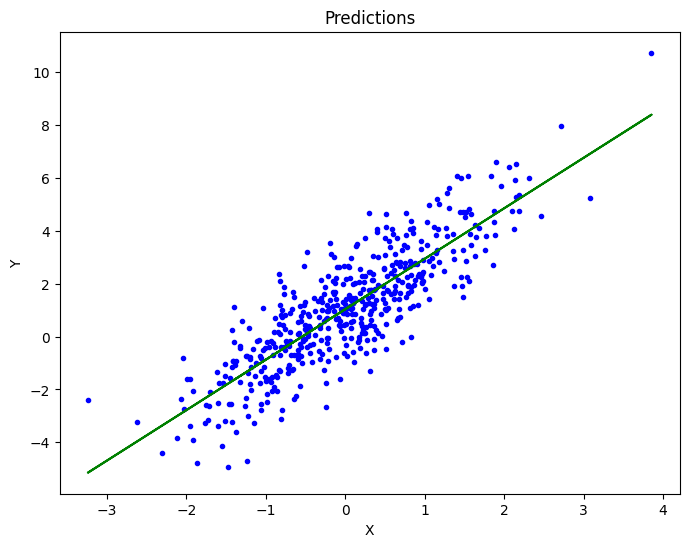

In [5]:
from sklearn.linear_model import SGDRegressor

### SOLUTION

gd_model = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=1000, tol=1e-3)
gd_model.fit(X, y)
pred3 = model.predict(X)

###

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred3, "g-")

Notebook references:

Season 3 and 2 UCLAIS linear regression notebook

[Towards Data Science - Normal Equation in Python](https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71)
